Construct Co Authorship Networks
---------------------------

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np

In [5]:
import imp
tools = imp.load_source('tools', '../tools.py')

from tools import generate_graph

In [6]:
%matplotlib inline

In [7]:
import matplotlib.patches as mpatches
import matplotlib.lines as lines

legend_properties = {'weight':'bold'}

Generating Graph
------------------

In [8]:
ipd     = pd.read_json('../data/pd_November_2018_clean.json')
anarchy = pd.read_json('../data/anarchy_November_2018_clean.json')
auction  = pd.read_json('../data/auction_November_2018_clean.json')

In [6]:
G_1 = generate_graph(ipd)
G_2 = generate_graph(anarchy)
G_3 = generate_graph(auction)

In [7]:
graphs = [G_1, G_2, G_3]

In [8]:
for G, filename in zip(graphs, ['pd_graph', 'auction_graph', 'anarchy_graph']):
    nx.write_gml(G, "../data/{}.gml".format(filename))

Illustrating co-authors network
------------------------

**Use Gephi**

Network Metrics
-----------------------

In [11]:
number_edges = [nx.number_of_edges(G) for G in graphs]

[9680, 1920, 7753]

In [12]:
file = open("../../assets/pd_edges.txt", 'w')
file.write('{}'.format(number_edges[0]))
file.close()

In [14]:
number_nodes = [nx.number_of_nodes(G) for G in graphs]
number_nodes

[4569, 1084, 4576]

In [14]:
file = open("../../assets/pd_unique_authors.txt", 'w')
file.write('{}'.format(number_nodes[0]))
file.close()

Collaborative Behaviour
-----------------------------

In [9]:
isolated_authors = [len(list(nx.isolates(G))) for G in graphs]

In [10]:
file = open("../../assets/isolated_authors.txt", 'w')
file.write('{}'.format(isolated_authors[0]))
file.close()

In [15]:
isolated_authors_percentage = [isolated / nodes for isolated, nodes in zip(isolated_authors, number_nodes)]

In [16]:
file = open("../../assets/isolated_authors_percentage.txt", 'w')
file.write('{}'.format(isolated_authors_percentage[0]))
file.close()

In [17]:
number_connected_components = [nx.number_connected_components(G) for G in graphs]

In [18]:
number_connected_components

[989, 198, 949]

In [19]:
file = open("../../assets/number_of_connected.txt", 'w')
file.write('{}'.format(number_connected_components[0]))
file.close()

In [20]:
subgraphs = [list(nx.connected_component_subgraphs(G)) for G in graphs]

In [21]:
largest_cc = [len(max(nx.connected_components(G), key=len)) for G in graphs]

In [22]:
file = open("../../assets/largest_cc.txt", 'w')
file.write('{}'.format(largest_cc[0]))
file.close()

In [23]:
clustering_coeff = [round(nx.average_clustering(G), 3) for G in graphs]

In [24]:
file = open("../../assets/clustering_coeff.txt", 'w')
file.write('{}'.format(clustering_coeff[0]))
file.close()

In [25]:
#from networkx.algorithms.community import greedy_modularity_communities
import community

In [26]:
#modularity =  [greedy_modularity_communities(G) for G in graphs]

In [27]:
communities = [community.best_partition(G) for G in graphs]

In [28]:
# global_modularity = [community.modularity(communities, G) for G in graphs]

In [31]:
# c = list(greedy_modularity_communities(graphs[0]))
# sorted(c[0])

In [32]:
degree_distributions = [sorted([d for n, d in G.degree()], reverse=True) for G in graphs]

In [33]:
av_degree = [np.mean(degree) for degree in degree_distributions]

In [34]:
file = open("../../assets/av_degree.txt", 'w')
file.write('{}'.format(av_degree[0]))
file.close()

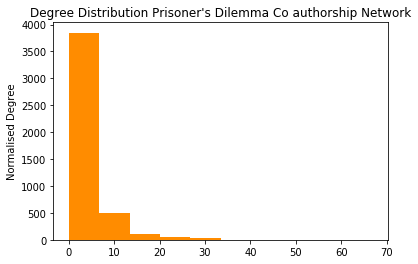

In [36]:
fig = plt.figure
plt.hist(degree_distributions[0],  color='darkorange')
plt.ylabel('Normalised Degree')
plt.title("Degree Distribution Prisoner's Dilemma Co authorship Network")
plt.savefig('../../assets/images/pd_degree_distribution.pdf')

In [50]:
frame = {'# Isolated': isolated_authors, '% Isolated': isolated_authors_percentage,
         '# Connected Components': number_connected_components, 'Largest cc': largest_cc,
         'Clustering': clustering_coeff, 'Av. Degree': av_degree}

In [60]:
table = pd.DataFrame.from_dict(frame, orient='index').round(2)
table.columns= ["Prisoner's Dilemma", "Price of Anarchy", "Auction Games"]

In [61]:
file = open("../../assets/network_comparison.tex", 'w')
file.write('{}'.format(table.to_latex()))
file.close()

Temporal
---------

Av. degree over time  + largest component over time

In [2]:
start = 1951
periods = []
while start < 2021:
    start += 5
    periods.append(start)

In [11]:
cumilative = [ipd[ipd['date'] <= period] for period in periods]

In [12]:
cumilative_graphs = [generate_graph(c) for c in cumilative]

/home/nightwing/anaconda3/envs/literature/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
degree_points = []
largest_cc_points = []
number_of_cc_points = []
for G in cumilative_graphs:
    degree = sorted([d for n, d in G.degree()], reverse=True)
    largest_cc_points.append(len(max(nx.connected_components(G), key=len)))
    degree_points.append(np.mean(degree))
    number_of_cc_points.append(nx.number_connected_components(G))

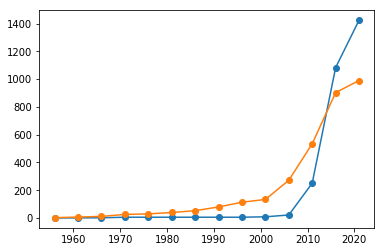

In [20]:
fig = plt.figure()
plt.plot(periods, largest_cc_points, '-o');
plt.plot(periods, number_of_cc_points, '-o');

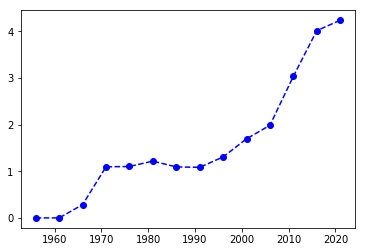

In [23]:
fig = plt.figure()
plt.plot(periods, degree_points, '--bo');

**Centrality**

In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. 
*wikipedia link: https://en.wikipedia.org/wiki/Centrality*

We could illustrate these names on the graph.

In [106]:
# betweeness = sorted(nx.betweenness_centrality(G, normalized=True).items(), 
#                     key=lambda x:x[1], reverse=True)

In [ ]:
dist = [b[1] for b in betweeness]

In [ ]:
file = open("pd_bc_dist.tex",'w')
file.write('{}'.format(dist))
file.close()

In [ ]:
betweeness = pd.DataFrame(betweeness[0:5], columns=['Author name', 'Betweeness'])
betweeness['Author name'] = [name.title() for name in betweeness['Author name']]
betweeness.index += 1

In [ ]:
closeness_rank = sorted(nx.closeness_centrality(G, normalized=True).items(), 
                   key=lambda x:x[1], reverse=True)

In [ ]:
dist = [b[1] for b in closeness_rank]

In [ ]:
file = open("pd_cc_dist.tex",'w')
file.write('{}'.format(dist))
file.close()

In [ ]:
closeness_rank = pd.DataFrame(closeness_rank[0:5], columns=['Author name', 'Closeness'])
closeness_rank['Author name'] = [name.title() for name in closeness_rank['Author name']]
closeness_rank.index += 1

In [ ]:
for centrality, label in zip([betweeness, closeness_rank],
                             ['betweness', 'closeness']):
    file = open("/home/nightwing/rsc/Literature-Article/assets/prisoners_centrality_{}.tex".format(label),
                'w')
    file.write('{}'.format(pd.DataFrame(centrality).to_latex()))
    file.close()